** Step - 1 : Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

**Step - 2 : Load Dataset**

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

In [7]:
dataset = pd.read_csv('iris.data',header=None)
dataset.columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Class']

In [10]:
dataset.head() # top five rows

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


*Check for missing values*

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Petal Width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


**Step - 3 : Convert dataframe into array and extract indenpende and dependent** 

In [12]:
X = dataset.iloc[:,[1,3]].values # independent varibles
y = dataset.iloc[:,-1].values # dependent variables

In [19]:
y = y.reshape(-1,1) # coloumn matrix
# y = y.reshape(1,-1) # row matrix

In [20]:
X.shape, y.shape

((150, 2), (150, 1))

** Step -4 : Data Preprocessing **
    - missing values
    - categorical data

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label = LabelEncoder()

In [32]:
y = label.fit_transform(y)

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

**Step - 5: Visualize if possible**

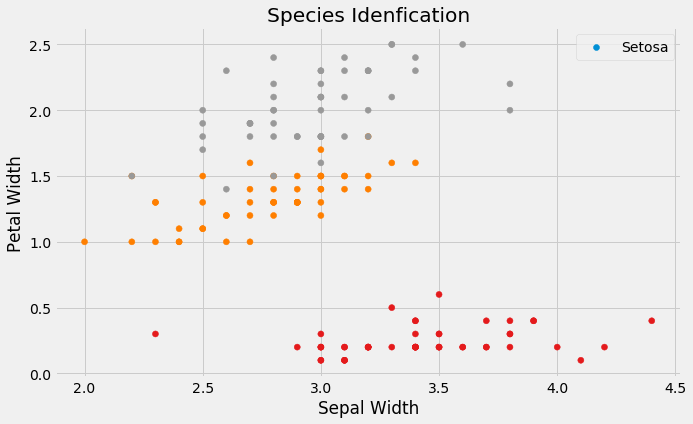

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c = y, cmap = 'Set1')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Species Idenfication')
plt.legend(['Setosa','Versicolor','Viginica'])
plt.show()

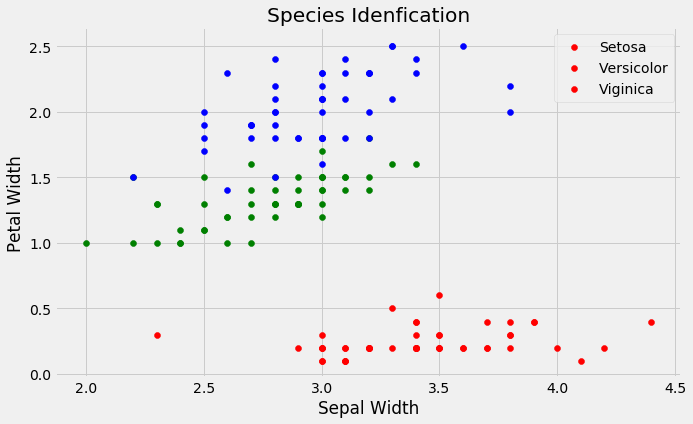

In [49]:
plt.figure(figsize=(10,6))
for i in range(len(y)):
    #print(i)
    if y[i] == 0:
        col = 'red'
    elif y[i] == 1:
        col = 'green'
    else:
        col = 'blue'
        
    plt.scatter(X[i,0],X[i,1],color = col)
    
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Species Idenfication')
plt.legend(['Setosa','Versicolor','Viginica'])
plt.show()

** Step -5 : Spliting data into traning and testing sets**

In [50]:
from sklearn.cross_validation import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.30)

In [52]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 2), (45, 2), (105,), (45,))

** Step - 6: Logistic Regression**

In [53]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression(C = 100.0)
model.fit(x_train, y_train) # training 
y_pred = model.predict(x_test) # predicting

**Step -7 : Evaluating**

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

Text(13.06,0.5,'Predicted Values')

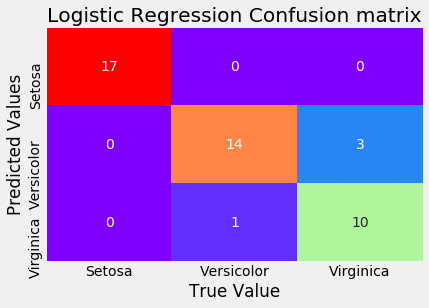

In [67]:
sns.heatmap(cm,annot=True,cbar=False,
           xticklabels=['Setosa','Versicolor','Virginica'],
           yticklabels=['Setosa','Versicolor','Virginica'], cmap = 'rainbow')
plt.title('Logistic Regression Confusion matrix')
plt.xlabel('True Value')
plt.ylabel('Predicted Values')

In [68]:
print(cr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       0.93      0.82      0.87        17
          2       0.77      0.91      0.83        11

avg / total       0.92      0.91      0.91        45



# Visualiztion

In [69]:
from matplotlib.colors import ListedColormap

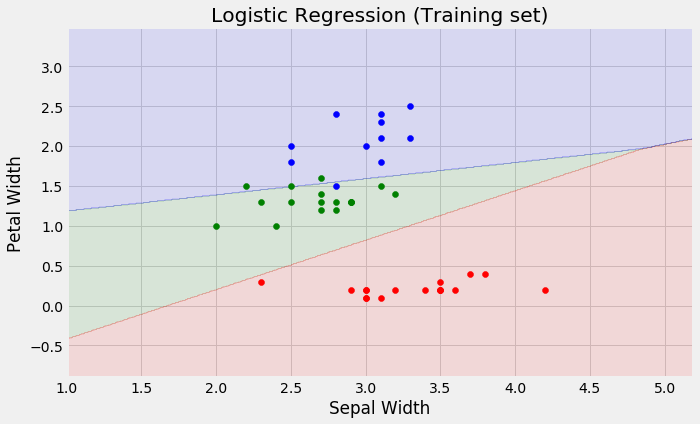

In [71]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.1, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i in range(len(y_set)):
    if y_set[i] == 0:
        c = 'red'
    elif y_set[i] == 1:
        c = 'green'
        
    else:
        c = 'blue'
        
    plt.scatter(X_set[i,0], X_set[i,1],color = c)
    

plt.title('Logistic Regression (Training set)')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
#plt.legend()
plt.show()